In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

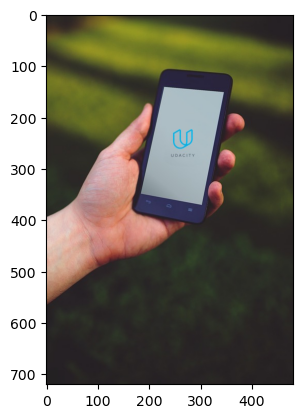

In [2]:
image = cv2.imread('./../images/phone.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

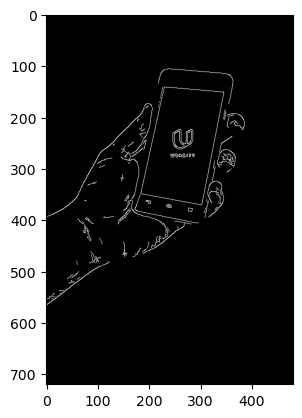

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)
plt.imshow(edges, cmap="gray")

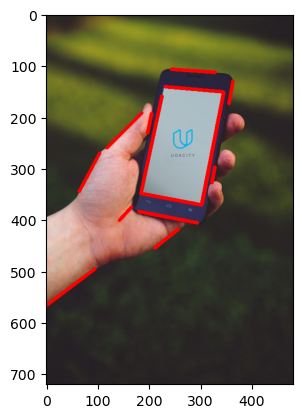

In [6]:
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 25
max_line_gap = 5

line_image = np.copy(image)

lines = cv2.HoughLinesP(
    edges,
    rho,
    theta,
    threshold,
    np.array([]),
    min_line_length,
    max_line_gap
)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

plt.imshow(line_image)

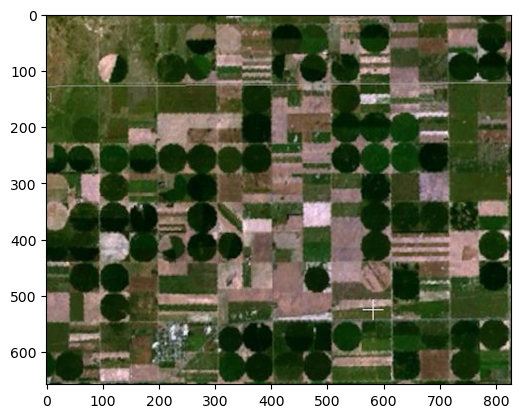

In [7]:
image = cv2.imread('./../images/round_farms.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

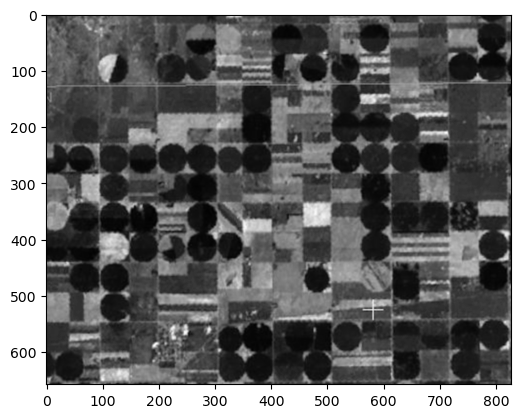

In [11]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

gray_blur = cv2.GaussianBlur(gray, (3,3), 0)
plt.imshow(gray_blur, cmap='gray')

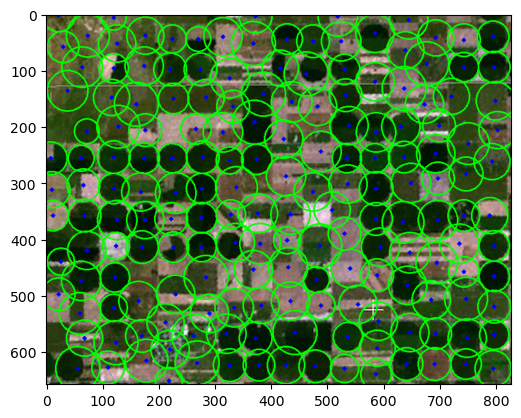

In [14]:
circles_im = np.copy(image)

circles = cv2.HoughCircles(
    gray_blur,
    cv2.HOUGH_GRADIENT,
    1,
    minDist=45,
    param1=70,
    param2=11,
    minRadius=20,
    maxRadius=40
)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    cv2.circle(circles_im, tuple(i[:2]), i[2], (0, 255, 0), 2)
    cv2.circle(circles_im, tuple(i[:2]), 2, (0,0,255),3)
plt.imshow(circles_im)